# Imports

In [ ]:
!pip uninstall numba
!pip install numba

Found existing installation: numba 0.56.4
Uninstalling numba-0.56.4:
  Would remove:
    /usr/local/bin/numba
    /usr/local/bin/pycc
    /usr/local/lib/python3.10/dist-packages/numba-0.56.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numba/*
Proceed (Y/n)? y
  Successfully uninstalled numba-0.56.4


In [ ]:
!pip uninstall numpy
!pip install numpy==1.23.0

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.24.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.24.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 31.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.7.0 requires jax>=0.4.2, but you have jax 0.3.25 which is

In [ ]:
import soundfile as sf
import pandas as pd
import librosa
import numpy as np
import matplotlib
import shutil
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import tensorflow as tf
import sklearn
from scipy.io import wavfile
import tensorflow.keras as keras
from scipy.signal import butter, lfilter
from IPython.display import Audio, display
import ipywidgets as widgets
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from IPython.display import Audio, display
from scipy.signal import freqz, firwin
import numpy as np
from PIL import Image
import librosa.display
from pathlib import Path
import matplotlib as mpl
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import LabelEncoder
import cv2
import pandas as pd
import os
import librosa
import librosa.display
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.layers import LSTM, Dense, Dropout
import wave
import math

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

PR = '/content/gdrive/MyDrive/RoadSounds/Road Noises/'
PA = '/content/gdrive/MyDrive/RoadSounds/Ambulance data/'
PATH = '/content/gdrive/MyDrive/RoadSounds/'
MR = "/content/gdrive/MyDrive/RoadSounds/Mel2/Road/"
MA = "/content/gdrive/MyDrive/RoadSounds/Mel2/Ambulance/"
DIR = [PR, PA]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
VA = '/content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/'
VR = '/content/gdrive/MyDrive/VehiclesInMotion/Road Noises/'

In [ ]:
def extract_mfcc(audio_file, n_mfcc=13):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs, axis=1)

def preprocess_features(features):
    # Normalize features to have zero mean and unit variance
    return (features - np.mean(features, axis=0)) / np.std(features, axis=0)

def cluster_audio_files(audio_files, n_clusters, n_mfcc):
    features = []
    for file in audio_files:
        mfcc = extract_mfcc(file, n_mfcc)
        features.append(mfcc)

    # Preprocess the features
    X = preprocess_features(np.array(features))

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)

    # Create a dictionary to store cluster assignments for each file
    cluster_dict = {file: cluster for file, cluster in zip(audio_files, cluster_labels)}
    return cluster_dict

if __name__ == "__main__":
    # Replace 'audio_folder_path' with the path to the directory containing your audio files
    audio_folder_path = VA
    audio_files = [os.path.join(audio_folder_path, f) for f in os.listdir(audio_folder_path) if f.endswith(".wav")]

    # Set the number of clusters (classes) to 2 since we want to separate them into two groups
    num_clusters = 2

    # Set the number of MFCC coefficients to extract (you can adjust this based on your needs)
    num_mfcc = 25

    # Cluster the audio files
    clusters = cluster_audio_files(audio_files, n_clusters=num_clusters, n_mfcc=num_mfcc)

    # Print the cluster assignments for each audio file
    for file, cluster in clusters.items():
        print(f"File: {file}, Cluster: {cluster}")


File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance537.wav, Cluster: 1
File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance543.wav, Cluster: 1
File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance546.wav, Cluster: 1
File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance10.wav, Cluster: 1
File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance637.wav, Cluster: 0
File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance636.wav, Cluster: 0
File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance16.wav, Cluster: 0
File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance15.wav, Cluster: 0
File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance464.wav, Cluster: 0
File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance124.wav, Cluster: 0
File: /content/gdrive/MyDrive/VehiclesInMotion/Ambulance data/ambulance119.wav, Cluster: 0
Fi

In [ ]:
cluster_0_files = [file for file, cluster in clusters.items() if cluster == 0]
cluster_1_files = [file for file, cluster in clusters.items() if cluster == 1]

audio_files_motion = cluster_1_files
current_index = 0
input_path = audio_files_motion[current_index]
audio_viewer = ''
# Function to play audio and display the current index
def play_audio(file_path):
    audio_data, sr = librosa.load(file_path)
    global audio_viewer
    clear_output()
    audio_viewer = Audio(audio_data, rate=sr, autoplay=True)
    display(audio_viewer)
    print(f"Current Index: {current_index}/{len(audio_files_motion) - 1}")

    next_button = widgets.Button(description='Next')
    next_button.on_click(next_button_clicked)

    next_button_2 = widgets.Button(description='Skip 10')
    next_button_2.on_click(skip_10)

    display(next_button)
    display(next_button_2)

# Function to handle the next button click
def next_button_clicked(b):
    global current_index
    global input_path
    current_index = (current_index + 1)
    input_path = audio_files_motion[current_index]
    play_audio(audio_files_motion[current_index])

def skip_10(b):
    global current_index
    global input_path
    current_index = (current_index + 10)
    input_path = audio_files_motion[current_index]
    play_audio(audio_files_motion[current_index])


# Play the first audio file and display the button
play_audio(audio_files_motion[current_index])

Current Index: 6/6


Button(description='Next', style=ButtonStyle())

Button(description='Skip 10', style=ButtonStyle())

# Utilities

In [ ]:
def bandpass_filter(signal, lowcut, highcut, fs, order=20000):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b = firwin(order, [low, high], pass_zero=False)
    w, h = freqz(b, 1, worN=2*fs, fs=fs)
    filtered_signal = np.convolve(signal, b, mode='same')
    return filtered_signal, w, h

In [ ]:
def to_spec_wav(path, fname, save=False):
  y, sr = librosa.load(path, sr=20000)
  spectrogram = librosa.stft(y)

  # Convert the spectrogram to decibel scale
  spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

  # Display the spectrogram without axes
  librosa.display.specshow(spectrogram_db, sr=sr)

  #Save the figure
  if save:
    plt.savefig("spec_"+fname.replace('wav','png'), bbox_inches='tight', pad_inches=0)

  plt.show()
  plt.close()

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [ ]:
x = pd.concat([df['mfcc1'], df['mfcc2'], df['mfcc3'], df['mfcc4'], df['mfcc5'], df['mfcc6'], df['mfcc7'], df['mfcc8'], df['mfcc9'], df['mfcc10'], df['mfcc11'], df['mfcc12'], df['mfcc13'], df['mfcc14'], df['mfcc15'], df['mfcc15.1'], df['mfcc16'], df['mfcc17'], df['mfcc18'], df['mfcc19'], df['mfcc20']], axis=1)
x
y = df['label']
y
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(y)
y = labels_encoded

In [ ]:
def to_mel_wav(fname, save=False, display=True, path='', save_path='', n_mels=128, cmap='magma'):
  y, sr = librosa.load(path+fname, sr=20000)

  win_length=int(0.1*sr)
  hop_length = 100

  mel = librosa.feature.melspectrogram(
    y=y, sr=sr,
    n_mels=n_mels,
    hop_length=hop_length,
    win_length=win_length,
    #center = False,
    fmin=500,
    fmax=5000
    )
  mel = librosa.amplitude_to_db(mel)
  #img = librosa.display.specshow(mel, sr=sr)

  #if save:
  mel_n = NormalizeData(mel)
  im = Image.fromarray(np.uint8(mpl.colormaps[cmap](mel_n)*255)).transpose(Image.FLIP_TOP_BOTTOM)
  plt.axis('off')
  plt.imshow(im)
  plt.savefig(save_path+fname.replace('wav','png'), bbox_inches='tight', pad_inches=0)

In [ ]:
directories = [PA, PR]
n=0

output_path= 'Chunks/'
shutil.rmtree('Chunks/')
output_path= 'Chunks/'
os.makedirs(output_path)
chunk_duration = 5.0
kwargs = {"mode": "wrap"}

for directory in directories:
  for filename in os.listdir(directory):
    print(n)
    audio_path = directory + filename
    n = n + 1
    if filename.endswith('.wav') and filename in audio_path is not True:

      audio, sr = librosa.load(audio_path, sr=20000)

      # Calculate total duration in seconds
      total_duration = librosa.get_duration(y=audio, sr=sr)

      # Calculate number of chunks needed
      num_chunks = math.ceil(total_duration / chunk_duration)

      # Pad audio to the next multiple of chunk_duration if necessary
      padded_duration = math.ceil(total_duration / chunk_duration) * chunk_duration
      audio = librosa.util.fix_length(data=audio, size=int(padded_duration * sr), **kwargs)

      # Split audio into chunks
      #chunks = librosa.util.frame(audio, frame_length=int(chunk_duration * sr), hop_length=int(chunk_duration * sr))
      # Save each chunk as a separate audio file
      chunks = np.hsplit(audio, len(audio)/(chunk_duration * sr))
      del audio

      for i, chunk in enumerate(chunks):
        #X.append(chunk)
        chunk_output_path = os.path.join(output_path, filename.replace('.wav', '') + f"chunk_{i + 1}.wav")
        #librosa.output.write_wav(chunk_output_path, chunk, sr)
        sf.write(chunk_output_path, chunk, sr)

      del chunks

In [ ]:
data, sr = librosa.load(dir + "ambulance100chunk_1.wav", mono=True)
win_length=int(0.1*sr)
hop_length= int(0.25 * win_length)

n_fft=int(0.25 * sr)
n_mfcc=25

spectrogram = librosa.feature.mfcc(y=data, n_fft=n_fft,hop_length=hop_length,n_mfcc=n_mfcc, win_length = win_length, fmax =5000, fmin=500)
print(spectrogram.shape)
img2 = librosa.display.specshow(spectrogram, x_axis='time', sr=sr)
plt.show()

In [ ]:
X = []
y = []
dir = "Chunks/"

# Iterate over the audio files
for filename in os.listdir(dir):
  if filename.endswith('.wav'):
    data, sr = librosa.load(dir + filename, mono=True)
    win_length=int(0.1*sr)
    hop_length= int(0.25 * win_length)

    n_fft=int(0.25 * sr)
    n_mfcc=25

    spectrogram = librosa.feature.mfcc(y=data, n_fft=n_fft,hop_length=hop_length,n_mfcc=n_mfcc, win_length = win_length, fmax=2000, fmin=200)
    X.append(spectrogram)
    if 'road' in filename:
      y.append(0)
    else:
      y.append(1)


# Model

In [ ]:
import pandas as pd

# Read the first CSV file
df1 = pd.read_csv('/content/gdrive/MyDrive/RoadSounds/Ambulance_final.csv')

# Read the second CSV file
df2 = pd.read_csv('/content/gdrive/MyDrive/RoadSounds/Road_final.csv', header=None, names=df1.columns)

# Combine the two DataFrames
df = pd.concat([df1, df2], ignore_index=True)

# Print the combined DataFrame
df


In [ ]:
y = np.array(y)
X = np.array(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [ ]:
input_shape=(25,201)
model = keras.Sequential()
model.add(LSTM(512,input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 512)               1462272   
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 2)                

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(25, 201, 1)))
model.add(tf.keras.layers.Conv2D(16, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 101, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 50, 16)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 50, 32)         4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 25, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 25, 64)         18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 12, 64)        0

In [ ]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,epochs = 15, validation_data=(X_test, y_test))

Epoch 1/15
93/93 [==============================] - 10s 86ms/step - loss: 0.4353 - accuracy: 0.8645 - val_loss: 0.1476 - val_accuracy: 0.9383
Epoch 2/15
93/93 [==============================] - 4s 47ms/step - loss: 0.1395 - accuracy: 0.9582 - val_loss: 0.0971 - val_accuracy: 0.9634
Epoch 3/15
93/93 [==============================] - 4s 47ms/step - loss: 0.0913 - accuracy: 0.9740 - val_loss: 0.0737 - val_accuracy: 0.9750
Epoch 4/15
93/93 [==============================] - 8s 83ms/step - loss: 0.0858 - accuracy: 0.9727 - val_loss: 0.0645 - val_accuracy: 0.9846
Epoch 5/15
93/93 [==============================] - 5s 53ms/step - loss: 0.0705 - accuracy: 0.9767 - val_loss: 0.0679 - val_accuracy: 0.9827
Epoch 6/15
93/93 [==============================] - 4s 47ms/step - loss: 0.0957 - accuracy: 0.9734 - val_loss: 0.0593 - val_accuracy: 0.9846
Epoch 7/15
93/93 [==============================] - 6s 69ms/step - loss: 0.0694 - accuracy: 0.9815 - val_loss: 0.0600 - val_accuracy: 0.9884
Epoch 8/15
9

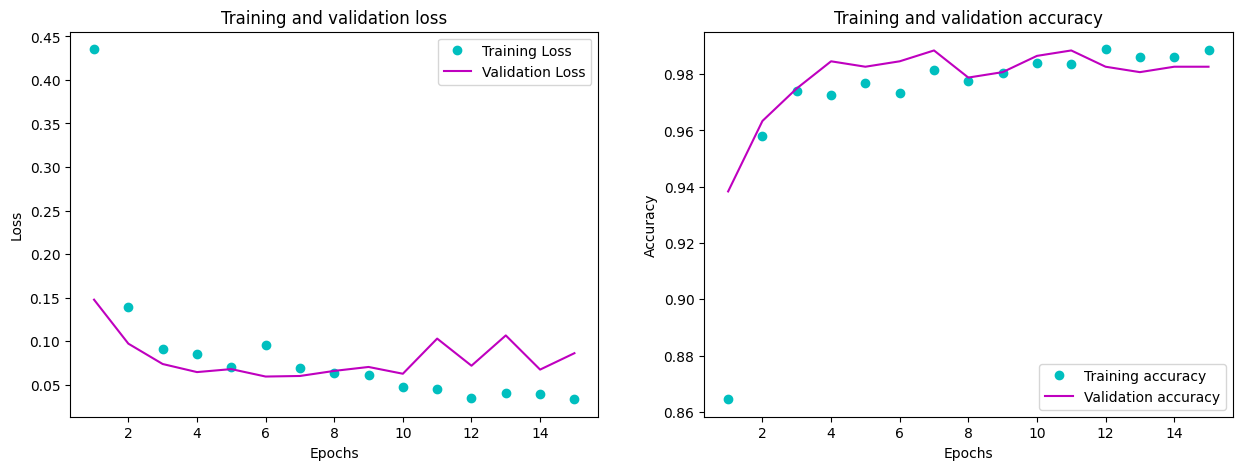

In [ ]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,16)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'co',label='Training Loss')
ax1.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'co', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'m',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 16ms/step - loss: 0.1242 - accuracy: 0.9776
Test accuracy: 0.9775784611701965


# Testing

In [ ]:
!pip install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.6.11 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
orbax-checkpoint 0.2.6 requires jax>=0.4.9, but you have jax 0.3.25 which is incompatible.
tensorflow 2.12.0 re

In [ ]:
model = tf.keras.models.load_model(PATH + 'model_best')

In [ ]:
output_path= 'Chunks_eval/'
#shutil.rmtree('Chunks/')
#os.makedirs(output_path)
chunk_duration = 5.0
kwargs = {"mode": "wrap"}
n = 0
PATH = "/content/gdrive/MyDrive/SirenSounds/"
SA   = "/content/gdrive/MyDrive/SirenSounds/ambulance/"
SF   = "/content/gdrive/MyDrive/SirenSounds/firetruck/"
ST   = "/content/gdrive/MyDrive/SirenSounds/traffic/"
SP   = "/content/gdrive/MyDrive/SirenSounds/police/"

directories = [SA, SF, ST, SP]
for directory in directories:
  for filename in os.listdir(directory):
    audio_path = directory + filename

    if filename.endswith('.wav') and filename in audio_path is not True:
      print(n)
      n = n + 1

      audio, sr = librosa.load(audio_path, sr=20000)

      # Calculate total duration in seconds
      total_duration = librosa.get_duration(y=audio, sr=sr)

      # Calculate number of chunks needed
      num_chunks = math.ceil(total_duration / chunk_duration)

      # Pad audio to the next multiple of chunk_duration if necessary
      padded_duration = math.ceil(total_duration / chunk_duration) * chunk_duration
      audio = librosa.util.fix_length(data=audio, size=int(padded_duration * sr), **kwargs)

      # Split audio into chunks
      #chunks = librosa.util.frame(audio, frame_length=int(chunk_duration * sr), hop_length=int(chunk_duration * sr))
      # Save each chunk as a separate audio file
      chunks = np.hsplit(audio, len(audio)/(chunk_duration * sr))
      del audio

      for i, chunk in enumerate(chunks):
        filename = directory.replace("/content/gdrive/MyDrive/SirenSounds/", '').replace("/", '') + filename.replace("sound", "")
        #X.append(chunk)
        chunk_output_path = os.path.join(output_path, filename.replace('.wav', '') + f"chunk_{i + 1}.wav")
        #librosa.output.write_wav(chunk_output_path, chunk, sr)
        sf.write(chunk_output_path, chunk, sr)

      del chunks

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
import os

_, _, files = next(os.walk("Chunks_eval/"))
file_count = len(files)
file_count

1675

In [ ]:
X_trial = []
X_files = []
y_trial = []
dir = "Chunks_eval/"

# Iterate over the audio files
for filename in os.listdir(dir):
  if filename.endswith('.wav'):
    data, sr = librosa.load(dir + filename, mono=True)
    win_length=int(0.1*sr)
    hop_length= int(0.25 * win_length)

    n_fft=int(0.25 * sr)
    n_mfcc=25

    spectrogram = librosa.feature.mfcc(y=data, n_fft=n_fft,hop_length=hop_length,n_mfcc=n_mfcc, win_length = win_length, fmax=5000, fmin=500)
    X_trial.append(spectrogram)
    X_files.append(filename)
    if 'traffic' in filename:
      y_trial.append(0)
    else:
      y_trial.append(1)

In [ ]:
X_trial = np.array(X_trial)
y_trial = np.array(y_trial)

In [ ]:
X_trial.shape

(1675, 25, 201)

In [ ]:
y_pred_eval = model.predict(X_trial)

53/53 [==============================] - 1s 14ms/step


In [ ]:
y_trial_pred = []
for n in y_pred_eval:
  y_trial_pred.append(np.argmax(n))

In [ ]:
accuracy = accuracy_score(y_trial, y_trial_pred)
accuracy

0.36895522388059704

In [ ]:
def labelCM(y, y_pred, X_files, kind = '.wav'):
  y_sel = []
  y_sel_pred = []

  for n in range(len(y_pred)):
    if kind in X_files[n]:
      y_sel.append(y[n])
      y_sel_pred.append(y_pred[n])

  disp = sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(y_sel,y_sel_pred))
  disp.plot()
  plt.show()

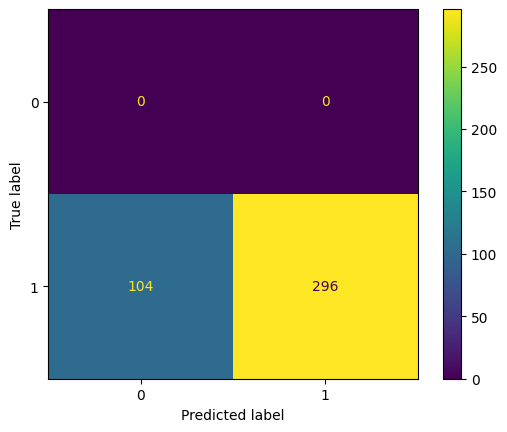

In [ ]:
labelCM(y_trial, y_trial_pred, X_files, kind = 'firetruck')